<a href="https://colab.research.google.com/github/anushChrist/AML_Lab/blob/main/2348504_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [ ]:
df = pd.read_csv("Program_1_dataset.csv")

### Printing the dataset

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


### Checking for missing values

In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

No missing value

In [ ]:
df.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

Visualization of the association between Average Rooms and M-Value

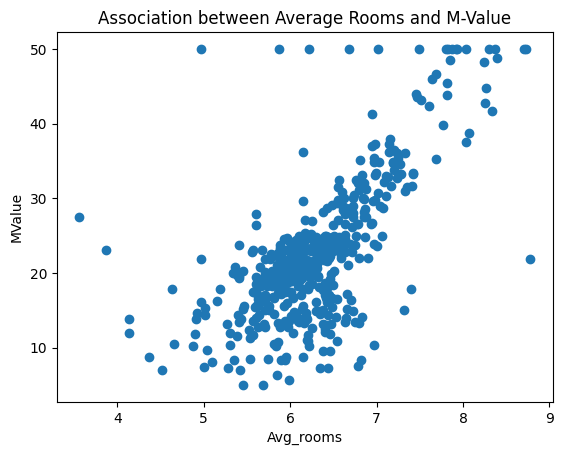

In [ ]:
plt.scatter(df['Avg_rooms '], df['MValue'])
plt.xlabel("Avg_rooms")
plt.ylabel("MValue")
plt.title("Association between Average Rooms and M-Value")
plt.show()

We observe a linear relationship between the two variables, with the possible presence of some outliers.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Splitting the dataset into 70:30

In [ ]:
X = df[['Avg_rooms ']]
Y = df['MValue']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Printing the Model parameters.

In [ ]:
print('Intercept:',model.intercept_)
print('Coefficients',model.coef_)

Intercept: -33.510147597513345
Coefficients [8.92620222]


This means that with every one unit increase in Avg_rooms, the median value increases by around $8,926

Storing the predicted Y test values

In [ ]:
y_pred = model.predict(x_test)

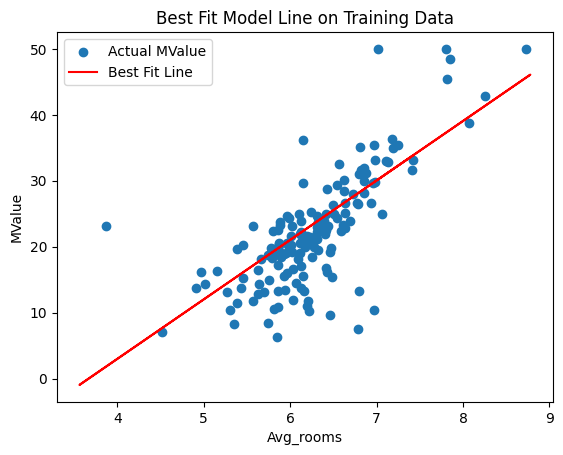

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, label='Actual MValue')
ax.plot(df1['Avg_rooms '],df1['Pred_MValue'],color='red',label='Best Fit Line')
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit Model Line on Training Data')
ax.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'(TESTING) Mean Squared Error (MSE): {mse:.2f}')
print(f'(TESTING) R-squared (R2) Score: {r2:.2f}')


(TESTING) Mean Squared Error (MSE): 33.85
(TESTING) R-squared (R2) Score: 0.54


In [ ]:
y_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

In [ ]:
print(f'(TRAINING) Mean Squared Error (MSE): {mse:.2f}')
print(f'(TRAINING) R-squared (R2) Score: {r2:.2f}')


(TRAINING) Mean Squared Error (MSE): 47.81
(TRAINING) R-squared (R2) Score: 0.46


We observe that the model performs better on the testing data than the training data???

We observe that the model performs better on the training data than the testing data.